In [1]:
import networkx as nx
import math
from aux_functions import *
import matplotlib.pyplot as plt
import random


infinity = 99999999999

quota = 500

dataset = load_dataset('problems/symmetrics/att48.tsp')
n = len(dataset)

G = nx.complete_graph(n) 

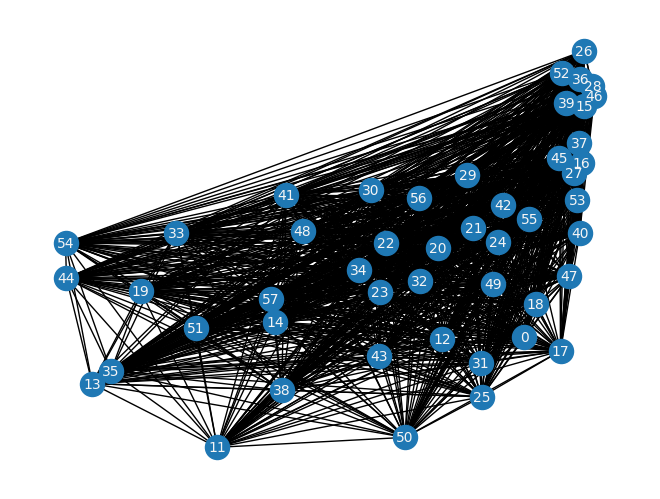

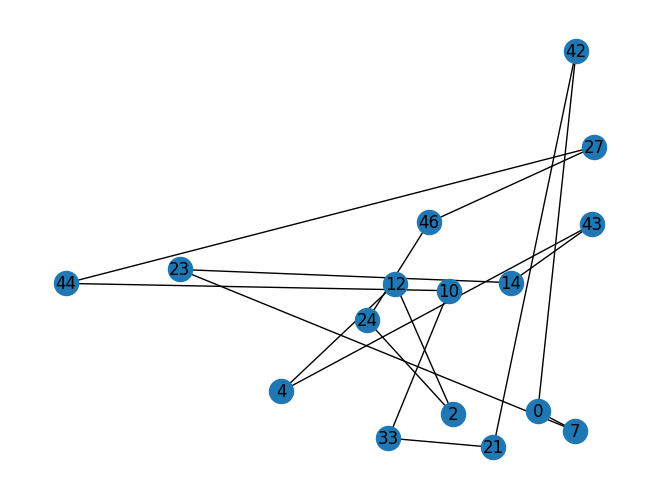

In [2]:
from generation import generation as gen

my_pos = { i : ( dataset[i].x, dataset[i].y ) for i in G.nodes }

bonus_label = {}

for i in G.nodes:
    if(i == 0):
        G.nodes[i]['bonus'] = 0
        bonus_label[0] = G.nodes[i]['bonus']
        G.nodes[i]['penalty'] = infinity
    else:
        bonus = dataset[i].id + 10
        bonus_label[i] = bonus
        G.nodes[i]['bonus'] = bonus
        G.nodes[i]['penalty'] =  500
    G.nodes[i]['id'] = dataset[i].id

for i,j in G.edges:
    (x1,y1) = my_pos[i]
    (x2,y2) = my_pos[j]
    G.edges[i,j]['length'] = eucl_dist(x1,y1,x2,y2)


route = gen.generate_random_route(G, quota)


nx.draw(G, pos=my_pos)
nx.draw_networkx_labels(G, my_pos, labels=bonus_label, font_size=10, font_color="whitesmoke")

plt.figure()
route_edges = [ (route[i-1]['id'],route[i]['id']) for i in range(len(route)) ]


nx.draw(G.edge_subgraph(route_edges), pos=my_pos, with_labels=True)


16524.727433980326
15000


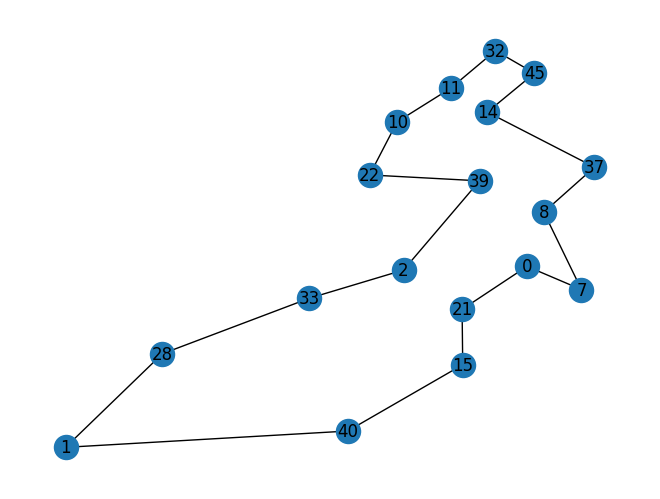

In [3]:
from generation import generation as gen

# ADD_step
route = gen.insert_from_closest(G, quota, my_pos)
plt.figure()
route_edges = [ (route[i-1]['id'],route[i]['id']) for i in range(len(route)) ]
nx.draw(G.edge_subgraph(route_edges), pos=my_pos, with_labels=True)

print(calculate_route_distance(route, G))
print(calculate_penalties(route, G))

In [4]:
# from local_search import local_search as ls

# # lin-kernighan
# route_lin = ls.lin_kernighan(route, G)

# route = [*route_lin[:len(route)]]
# plt.figure()
# route_edges = [ (route[i-1]['id'],route[i]['id']) for i in range(len(route)) ]
# nx.draw(G.edge_subgraph(route_edges), pos=my_pos, with_labels=True)

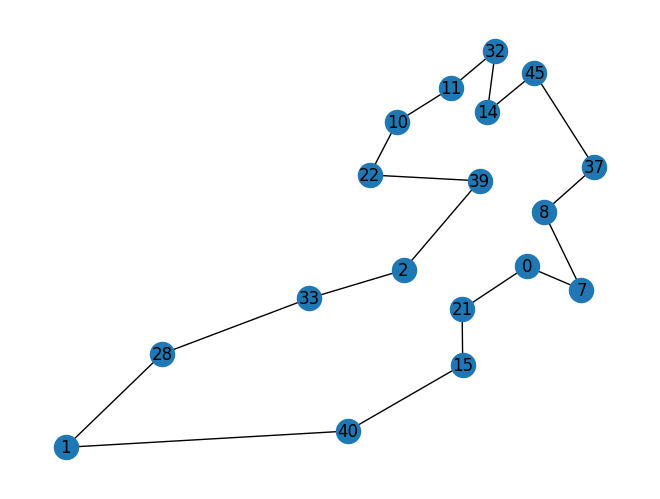

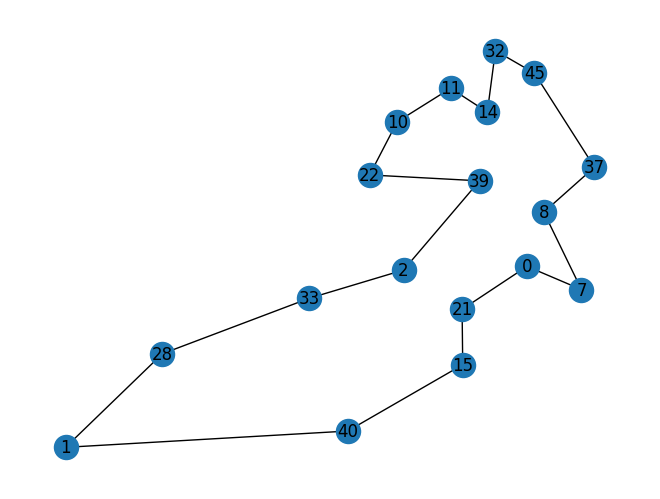

In [5]:
# 2-opt swap
from local_search import local_search as ls

route = ls.swap_2_opt(route, G, my_pos)

bonus_label = bonus_labels(route)